In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#plt.style.use('seaborn-dark')
import numpy as np
from mpl_toolkits import mplot3d

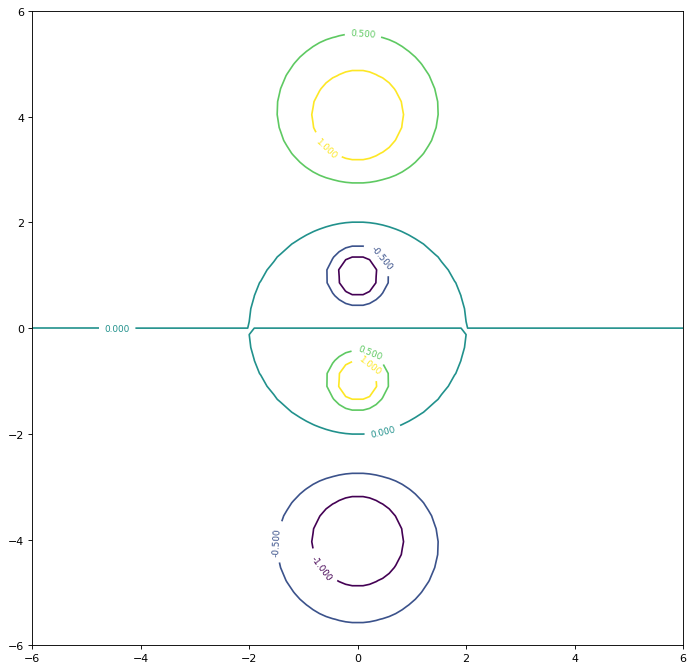

In [82]:
def f(x, y):
    z0 = 4
    R = 2
    V1 = 1 / np.sqrt(x**2+(y-z0)**2)
    V2 = -R/z0 / np.sqrt(x**2 + (y-R*R/z0)**2)
    V3 = R/z0 / np.sqrt(x**2 + (y+R*R/z0)**2)
    V4 = -1 / np.sqrt(x**2+(y+z0)**2)
    return V1 + V2 + V3 + V4

plt.figure(figsize = (10,10), dpi = 80)

x1 = np.linspace(-6, -.1, 50)
x2 = np.linspace(.1, 6 ,50)
x1 = np.append(x1, x2)
x = x1
y = np.linspace(-6, 6, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

contours = plt.contour(X, Y, Z, np.arange(-1,1.1,.5))

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

plt.clabel(contours, inline=True, fontsize=8)
plt.show()
#plt.colorbar()

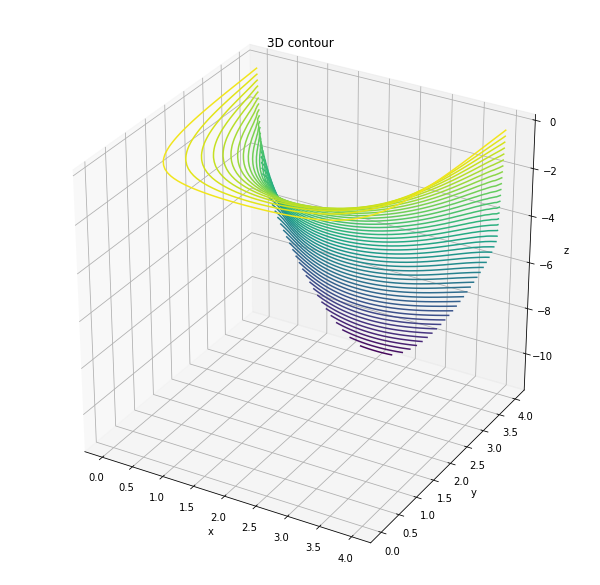

In [102]:
fig = plt.figure()
fig.set_size_inches(10.5, 10.5)
ax = plt.axes(projection='3d')
#ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
ax.clabel(contours, inline=True, fontsize=8)
plt.show()

<Figure size 800x800 with 0 Axes>

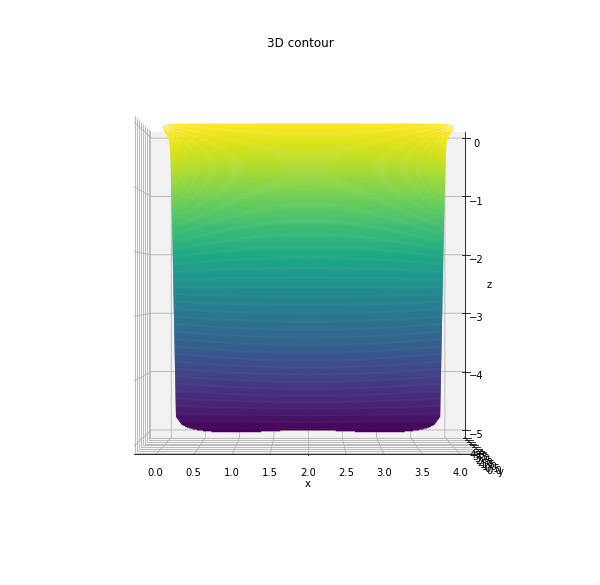

In [143]:
def f(x, y):
    V0 = 5
    value = 0
    n = 100
    while n > .9:
        value += -4*V0 / ((2*n-1)* np.pi) * np.sinh((2*n-1)*np.pi / l * y) / np.sinh((2*n-1) * np.pi * H / l) * np.sin((2*n-1)*np.pi*x/l)
        n -= 1
    return value

plt.figure(figsize = (10,10), dpi = 80)

l = 4
H = 4

x = np.linspace(0, l, 50)
y = np.linspace(0, H, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
fig.set_size_inches(10.5, 10.5)
ax = plt.axes(projection='3d')
#ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.contour3D(X, Y, Z, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
ax.clabel(contours, inline=True, fontsize=8)
ax.view_init(0, -90)
plt.show()

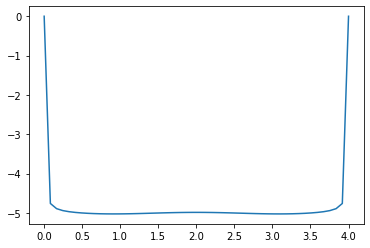

In [133]:
def f(x):
    V0 = 5
    value = 0
    n = 100
    while n > .9:
#         if n%2 == 0:
#             raise ValueError("An odd number must be used")
        value += -4*V0 / ((2*n-1)* np.pi) * np.sin((2*n-1)*np.pi*x/l)
        n -= 1
    return value

x = np.linspace(0,l, 50)
y = f(x)
plt.plot(x,y)

Help on method scatter in module mpl_toolkits.mplot3d.axes3d:

scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a scatter plot.
    
    Parameters
    ----------
    xs, ys : array-like
         The data positions.
    zs : float or array-like, optional, default: 0
        The z-positions. Either an array of the same length as *xs* and
        *ys* or a single value to place all points in the same plane.
    zdir : {'x', 'y', 'z', '-x', '-y', '-z'}, optional, default: 'z'
        The axis direction for the *zs*. This is useful when plotting 2D
        data on a 3D Axes. The data must be passed as *xs*, *ys*. Setting
        *zdir* to 'y' then plots the data to the x-z-plane.
    
        See also :doc:`/gallery/mplot3d/2dcollections3d`.
    
    s : scalar or array-like, optional, default: 20
        The marker size in points**2. Either an array of the same length
        as *xs* and *

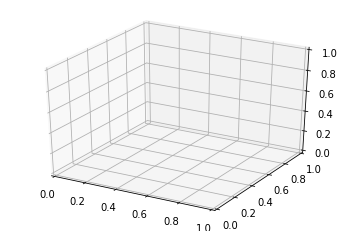

In [5]:
ax = plt.axes(projection='3d')
# zline = lum_solar
# xline = log_times
# yline = temp
# ax.plot3D(xline, yline, zline, 'red')
# ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens')
# ax.set_xlabel("Log [Age (years)]")
# ax.set_ylabel("Temperature (K)")
# ax.set_zlabel("Luminosity(L_sun)")

help(ax.scatter3D)

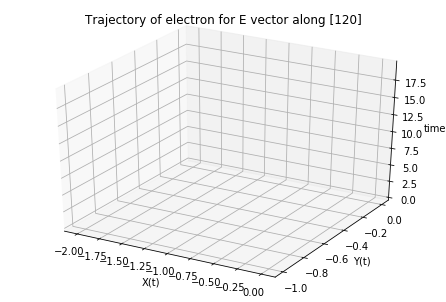

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
 
# References
# https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
 
# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line
 
 
# THE DATA POINTS
t = np.arange(0,20,0.2) # This would be the z-axis ('t' means time here)
x = np.cos(t)-1
y = 1/2*(np.cos(2*t)-1)
dataSet = np.array([x, y, t])
numDataPoints = len(t)
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
ax.set_title('Trajectory of electron for E vector along [120]')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=50, blit=False)
#line_ani.save(r'AnimationNew.mp4')

 
#plt.show()

In [10]:
8*np.pi*(6.7e-11)/(3e8)**4

2.0788810645976904e-43